1. Lees het bestand bank.csv in.  Het kan worden gebruikt om na te gaan of iemand een lening kan krijgen (kolom "pep" geeft dit weer)

In [46]:
import numpy as np
import pandas as pd

bank = pd.read_csv('data/bank.csv')
display(bank)

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48,FEMALE,INNER_CITY,17546.00,NO,1,NO,NO,NO,NO,YES
1,ID12102,40,MALE,TOWN,30085.10,YES,3,YES,NO,YES,YES,NO
2,ID12103,51,FEMALE,INNER_CITY,16575.40,YES,0,YES,YES,YES,NO,NO
3,ID12104,23,FEMALE,TOWN,20375.40,YES,3,NO,NO,YES,NO,NO
4,ID12105,57,FEMALE,RURAL,50576.30,YES,0,NO,YES,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
595,ID12696,61,FEMALE,INNER_CITY,47025.00,NO,2,YES,YES,YES,YES,NO
596,ID12697,30,FEMALE,INNER_CITY,9672.25,YES,0,YES,YES,YES,NO,NO
597,ID12698,31,FEMALE,TOWN,15976.30,YES,0,YES,YES,NO,NO,YES
598,ID12699,29,MALE,INNER_CITY,14711.80,YES,0,NO,YES,NO,YES,NO


2. Dit bestand is niet direct bruikbaar voor ID3 en moet dus aangepast worden:
 * de kolom "id" bevat unieke id's voor klanten en kunnen dus niets voorspellen.  Verwijder deze kolom.
 * in dit bestand zitten ook continue variabelen (income, age, children)
  * zet de waarden van "income" om in 5 categorieën (klassen)
   * 0 - 15538,8
   * 15538,8 - 21506,2
   * 21506,2 - 30404,3
   * 30404,3 - 44288,3
   * 44288,3 - 100000
  * zet de waarden van "age" om in 2 categorieën: 0 - 41 en 41-100
 * de waarden van children kunnen maar 4 waarden aannemen, dus dat laten we zo

In [47]:
bank = bank.drop(['id'], axis=1) # Delete kolom "id".

# Maak categorieën voor "income"
income_bins = [0, 15538.8, 21506.2, 30404.3, 44288.3, 100000]
income_labels = ['Insolventie', 'Precair', 'Stabiel', 'Comfortabel', 'Rijk']
bank['income'] = pd.cut(bank['income'], bins=income_bins, labels=income_labels)
# Helemaal niks: geen financiële reserves beschikbaar - Insolventie
# Weinig geld: minimale financiële reserves - Precair
# Gemiddeld geld: gemiddelde financiële reserves - Stabiel
# Veel geld: aanzienlijke financiële reserves - Comfortabel
# Heel veel geld: buitensporige financiële reserves - Rijk

# Maak categorieën voor "age"
age_bins = [0, 41, 100]
age_labels = ['Jong', 'Oud']
bank['age'] = pd.cut(bank['age'], bins=age_bins, labels=age_labels)
# Van 0 tot 41 jaar - Jong
# Van 41 tot 100 jaar - Oud


display(bank)

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,Oud,FEMALE,INNER_CITY,Precair,NO,1,NO,NO,NO,NO,YES
1,Jong,MALE,TOWN,Stabiel,YES,3,YES,NO,YES,YES,NO
2,Oud,FEMALE,INNER_CITY,Precair,YES,0,YES,YES,YES,NO,NO
3,Jong,FEMALE,TOWN,Precair,YES,3,NO,NO,YES,NO,NO
4,Oud,FEMALE,RURAL,Rijk,YES,0,NO,YES,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...
595,Oud,FEMALE,INNER_CITY,Rijk,NO,2,YES,YES,YES,YES,NO
596,Jong,FEMALE,INNER_CITY,Insolventie,YES,0,YES,YES,YES,NO,NO
597,Jong,FEMALE,TOWN,Precair,YES,0,YES,YES,NO,NO,YES
598,Jong,MALE,INNER_CITY,Insolventie,YES,0,NO,YES,NO,YES,NO


3. Maak een beslissingsboom met het ID3 algoritme.
Probeer de resulterende boom te interpreteren.  Komt dit overeen met je intuïtie?

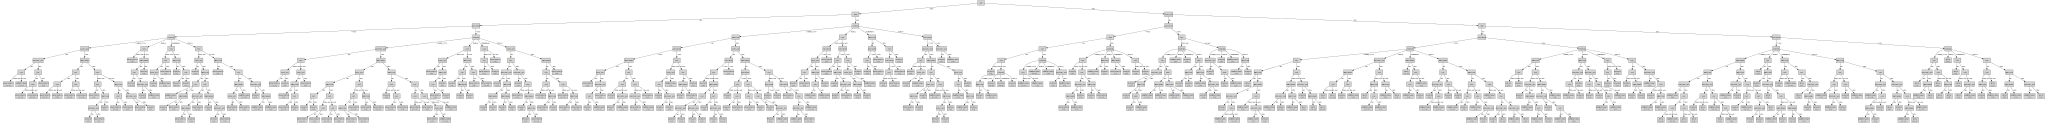

In [48]:
import graphviz
from id3 import Id3Estimator, export_graphviz

X = bank.drop(columns=['pep'], axis=1)
y = bank['pep']

model = Id3Estimator()

# Bouw het model
model.fit(X, y)

# maak model
model_tree = export_graphviz(model.tree_, feature_names=X.columns)
# toon beslissingsboom
graphviz.Source(model_tree.dot_tree)
# Dit is niet duidelijk of overzichtelijk Er zijn teveel mogelijkheden zover ik het kan lezen.

4. Lees de oorspronkelijke data opnieuw in.
Verwijder alle nominale en ordinale attributen. Aangezien er continue variabelen zijn, kan je niet kiezen voor ID3 algoritme, maar je kan wel kiezen voor C4.5 m.b.v. de Scikit Learn DecisionTreeClassifier. Voer dit algoritme uit en kijk wat het resultaat is.  Is dit beter of slechter dan ID3?

,age,income,children
0,48,Precair,1
1,40,Stabiel,3
2,51,Precair,0
3,23,Precair,3
4,57,Rijk,0
...,...,...,...
595,61,Rijk,2
596,30,Insolventie,0
597,31,Precair,0
598,29,Insolventie,0


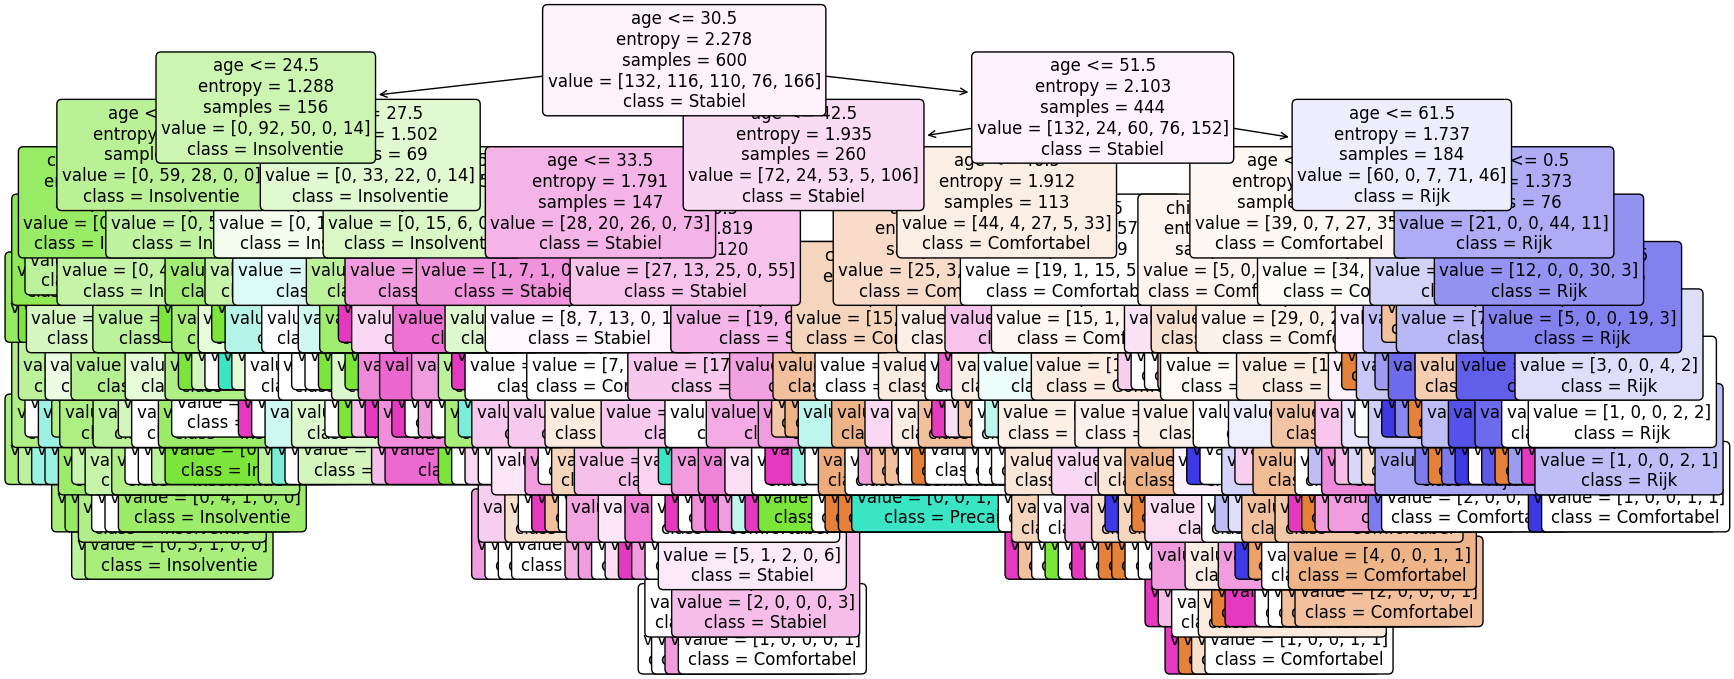

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

newBank = pd.read_csv('data/bank.csv')
newBank = newBank.drop(['id'], axis=1)          # Delete kolom "id".
newBank = newBank.drop(['sex'], axis=1)         # Delete kolom "sex".
newBank = newBank.drop(['region'], axis=1)      # Delete kolom "region".
newBank = newBank.drop(['married'], axis=1)     # Delete kolom "married".
newBank = newBank.drop(['car'], axis=1)         # Delete kolom "car".
newBank = newBank.drop(['save_act'], axis=1)    # Delete kolom "save_act".
newBank = newBank.drop(['current_act'], axis=1) # Delete kolom "current_act".
newBank = newBank.drop(['mortgage'], axis=1)    # Delete kolom "mortgage".
newBank = newBank.drop(['pep'], axis=1)         # Delete kolom "pep".

# Maak categorieën voor "income"
income_bins = [0, 15538.8, 21506.2, 30404.3, 44288.3, 100000]
income_labels = ['Insolventie', 'Precair', 'Stabiel', 'Comfortabel', 'Rijk']
newBank['income'] = pd.cut(newBank['income'], bins=income_bins, labels=income_labels)
# Helemaal niks: geen financiële reserves beschikbaar - Insolventie
# Weinig geld: minimale financiële reserves - Precair
# Gemiddeld geld: gemiddelde financiële reserves - Stabiel
# Veel geld: aanzienlijke financiële reserves - Comfortabel
# Heel veel geld: buitensporige financiële reserves - Rijk

display(newBank)

classifier = DecisionTreeClassifier(criterion='entropy')
X = newBank.drop(columns=['income'])
y = newBank.income
classifier.fit(X, y)

fig, ax = plt.subplots(figsize=(20, 8))
_ = tree.plot_tree(classifier, ax=ax, feature_names=X.columns.values, class_names=['{}'.format(i) for i in np.unique(y)], filled=True, fontsize=12, rounded=True)

5. Lees de oorspronkelijke data opnieuw in.
Ditmaal gaan geen attributen verwijderen en toch C4.5 gebruiken m.b.v. de Scikit Learn DecisionTreeClassifier en Pandas `get_dummies`. Voer dit algoritme uit en kijk wat het resultaat is.  Is dit beter of slechter dan vorige oplossingen?

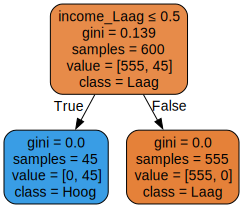

In [91]:
# lees de gegevens in
bank = pd.read_csv('data/bank.csv')

# converteer 'income' naar categorieën op basis van drempelwaarden
bank['income'] = pd.cut(bank['income'], bins=[0, 50000, np.inf], labels=['Laag', 'Hoog'])

# converteer categorische variabelen naar dummy variabelen
bank = pd.get_dummies(bank)

# split de data in features en target variabelen
X = bank.drop(columns=['income_Hoog'])
y = bank['income_Hoog']

# initialiseer en fit de classifier
classifier = DecisionTreeClassifier()
classifier.fit(X, y)

# exporteer de beslissingsboom als een DOT-bestand
dot_data = export_graphviz(classifier, out_file=None, feature_names=X.columns, class_names=['Laag', 'Hoog'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)

# toon de beslissingsboom
graph